In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [35]:
df_bees_stock = pd.read_csv('./data/FAOSTAT_data_en_bees.csv')
df_bees_stock.head()

df_honey_production = pd.read_csv('./data/US_honey_dataset_updated.csv')


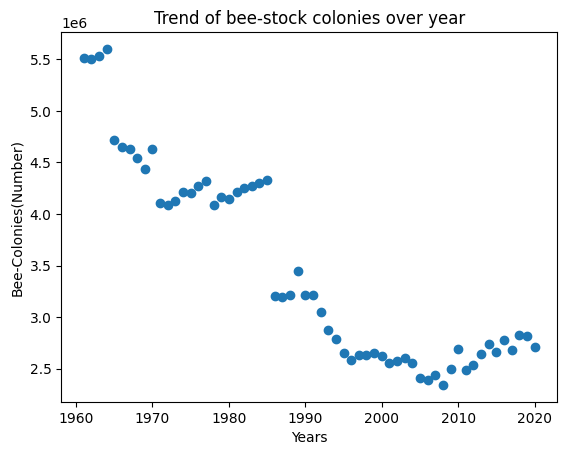

In [78]:
# df.Year.unique()
x = df_bees_stock[['Year']]
y = df_bees_stock[['Value']]
plt.title("Trend of bee-stock colonies over year")
plt.xlabel("Years")
plt.ylabel("Bee-Colonies(Number)")
plt.scatter(x,y)
plt.savefig('bee_stock_years.png')
plt.show()



In [79]:
df_bees = pd.DataFrame({
    'year': df_bees_stock['Year'], 
    'total_bees_stock': df_bees_stock['Value']
})

pickle_path = "./data/processed/beesstockVStime.pkl"

with open(pickle_path, "wb") as pfile:
    pickle.dump(df_bees, pfile)
    pickle.dump({'Unit': 'No'}, pfile)


In [80]:
df_honey_production.head()

df_honey_production.year.unique()


array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [81]:
df_honey_production.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

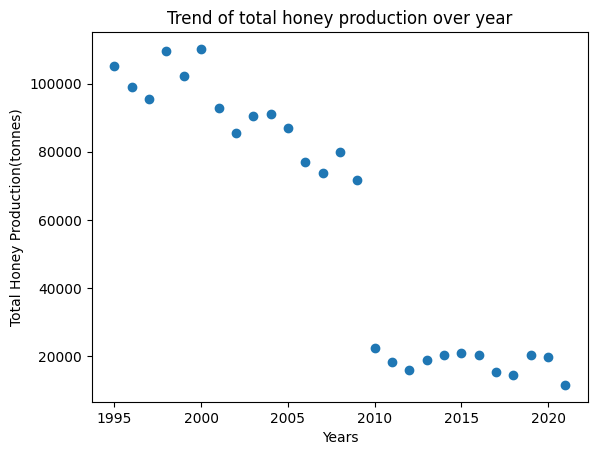

In [92]:
years = df_honey_production.year.unique()
df_honey_overall = pd.DataFrame()

totalColonies = []
totalYeildPerColony = []
totalProduction = []



for eachYear in years:
    df_for_that_year = df_honey_production.loc[df_honey_production['year'] == eachYear]

    totalColonies.append(df_for_that_year['colonies_number'].sum())
    totalYeildPerColony.append(df_for_that_year['yield_per_colony'].sum())
    totalProduction.append(df_for_that_year['production'].sum())

# converting pounds to tonnes
# 1 lb = 0.0005 ton
totalProduction = np.array(totalProduction) * 0.0005


df_honey_overall = pd.DataFrame({
    'year': years, 
    'total_honey_production': totalProduction,
    'total_honey_colonies': totalColonies,
    'total_yeild_per_colony': totalYeildPerColony
})

df_honey_overall

plt.title("Trend of total honey production over year")
plt.xlabel("Years")
plt.ylabel("Total Honey Production(tonnes)")
plt.scatter(df_honey_overall['year'], df_honey_overall['total_honey_production'])
plt.savefig('honey_production_years.png')
plt.show()


In [93]:
df_honey_production

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [94]:
df_honey = df_honey_overall

pickle_path = "./data/processed/honeyVStime.pkl"

with open(pickle_path, "wb") as pfile:
    pickle.dump(df_honey, pfile)
    pickle.dump({'Unit': 'No'}, pfile)

In [95]:
df_honey

,year,total_honey_production,total_honey_colonies,total_yeild_per_colony
0,1995,105136.0,2639000,2944
1,1996,98997.5,2560000,3083
2,1997,95588.0,2565000,2965
3,1998,109660.5,2618000,3008
4,1999,102292.5,2674000,2815
5,2000,110160.0,2617000,2904
6,2001,92701.5,2500000,2804
7,2002,85366.0,2516000,2960
8,2003,90370.5,2582000,2751
9,2004,91189.5,2533000,2601


In [96]:
df_honey = df_honey[df_honey.year != 2021]
df_honey

interpolated_years = []
total_honey_production = []
total_honey_colonies = []
total_yeild_per_colony = []

for eachYear in range(1961,1995):
    interpolated_years.append(eachYear)
    total_honey_production.append(np.nan)
    total_honey_colonies.append(np.nan)
    total_yeild_per_colony.append(np.nan)

pickle_path = "./data/processed/honeyVStime.pkl"

all_years = np.concatenate((np.array(interpolated_years), np.array(df_honey['year'])), axis=0)
all_production = np.concatenate((np.array(total_honey_production), np.array(df_honey['total_honey_production'])), axis=0)
all_colonies = np.concatenate((np.array(total_honey_colonies), np.array(df_honey['total_honey_colonies'])), axis=0)
all_yeild = np.concatenate((np.array(total_yeild_per_colony), np.array(df_honey['total_yeild_per_colony'])), axis=0)

df_honey_overall = pd.DataFrame({
    'year': all_years,
    'total_honey_production': all_production,
    'total_honey_colonies': all_colonies,
    'total_yeild_per_colony': all_yeild
})

# with open(pickle_path, "wb") as pfile:
#     pickle.dump(df_honey, pfile)
#     pickle.dump({'Unit': 'No'}, pfile)

df_honey_overall

,year,total_honey_production,total_honey_colonies,total_yeild_per_colony
0,1961,NaN,NaN,NaN
1,1962,NaN,NaN,NaN
2,1963,NaN,NaN,NaN
3,1964,NaN,NaN,NaN
4,1965,NaN,NaN,NaN
5,1966,NaN,NaN,NaN
6,1967,NaN,NaN,NaN
7,1968,NaN,NaN,NaN
8,1969,NaN,NaN,NaN
9,1970,NaN,NaN,NaN


In [97]:


# df_honey_overall

df_honey_overall = df_honey_overall.interpolate(method ='linear', limit_direction ='both', order=1)
df_honey_overall

with open(pickle_path, "wb") as pfile:
    pickle.dump(df_honey_overall, pfile)
    pickle.dump({'Unit': 'No'}, pfile)

In [98]:
with open("./data/processed/pesticidesVStime.pkl", "rb") as pfile:
    df_pesticides = pickle.load(pfile)

with open("./data/processed/emissionsVStime.pkl", "rb") as pfile:
    df_emissions = pickle.load(pfile)

In [99]:
df_pesticides.head()

,year,total_pesticides
0,1961,400975.93
1,1962,400975.93
2,1963,400975.93
3,1964,400975.93
4,1965,400975.93


In [100]:
df_emissions.head()

,year,total_emissions
0,1961,670.691137
1,1962,687.495281
2,1963,705.308444
3,1964,715.356844
4,1965,719.030654


In [101]:
# bee stock VS emissions
emissions = df_emissions['total_emissions']
bee_stock = df_bees_stock['Value']
honey = df_honey_overall['total_production']
pesticides = df_pesticides['Value']

emissions = (emissions - np.mean(emissions))/np.std(emissions)
bee_stock = (bee_stock - np.mean(bee_stock))/np.std(bee_stock)
honey = (honey - np.mean(honey))/np.std(honey)
pesticides = (pesticides - np.mean(pesticides))/np.std(pesticides)

KeyError: 'total_production'

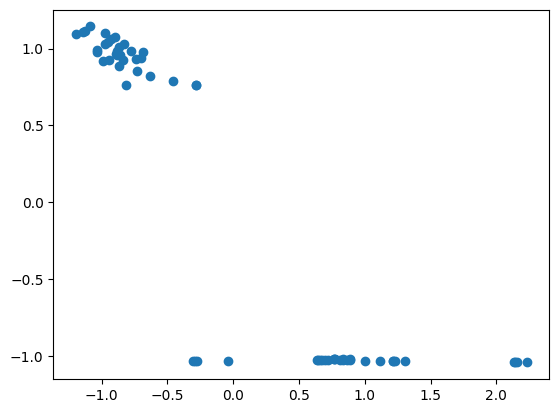

In [ ]:
# BEE stock VS emissions
plt.scatter(bee_stock, emissions)
plt.show()

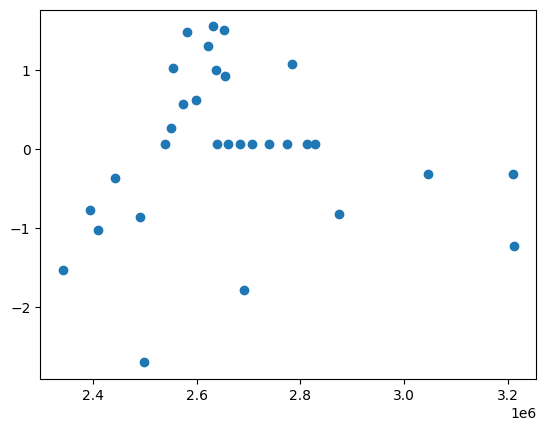

In [ ]:
# bee stock VS pesticides
reduced_size_bee_stock = df_bees_stock.loc[df_bees_stock['Year'] >= 1990]

plt.scatter(reduced_size_bee_stock['Value'], pesticides)
plt.show()

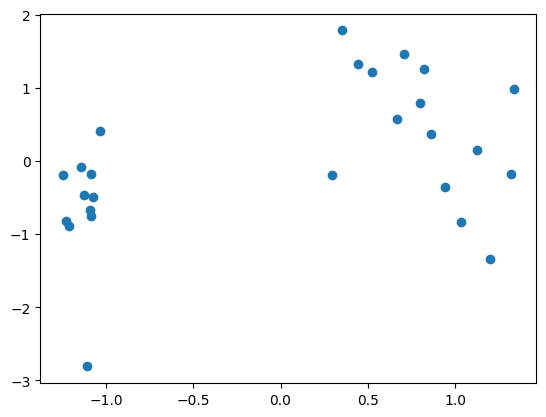

In [ ]:
df_honey_overall
reduced_honey = df_honey_overall.loc[df_honey_overall['year']>=1995]
reduced_honey = df_honey_overall.loc[df_honey_overall['year']<=2020]
reduced_honey = reduced_honey['total_production']
reduced_honey = (reduced_honey - np.mean(reduced_honey))/np.std(reduced_honey)

# 95 - 2020
reduced_emissions = df_emissions.loc[df_emissions['year']>=1995]
reduced_emissions = reduced_emissions['total_emissions']
reduced_emissions = (reduced_emissions - np.mean(reduced_emissions))/np.std(reduced_emissions)

plt.scatter(reduced_honey, reduced_emissions)
plt.show()

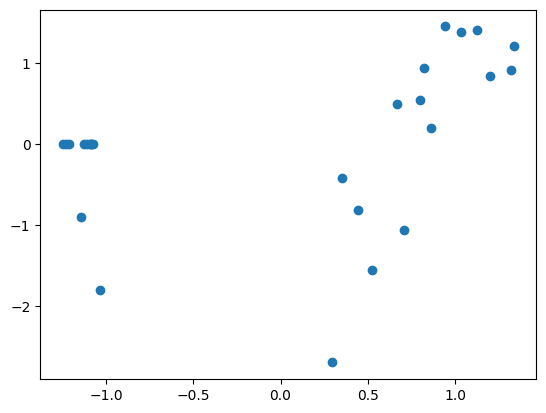

In [ ]:

# 1990 - 2020
df_pesticides

reduced_pesticides = df_pesticides.loc[df_pesticides['Year']>=1995]
reduced_pesticides = reduced_pesticides.loc[reduced_pesticides['Year']<=2020]
reduced_pesticides = reduced_pesticides['Value']
reduced_pesticides = (reduced_pesticides-np.mean(reduced_pesticides))/np.std(reduced_pesticides)

reduced_honey = df_honey_overall.loc[df_honey_overall['year']>=1995]
reduced_honey = df_honey_overall.loc[df_honey_overall['year']<=2020]
reduced_honey = reduced_honey['total_production']
reduced_honey = (reduced_honey - np.mean(reduced_honey))/np.std(reduced_honey)

plt.scatter(reduced_honey, reduced_pesticides)
plt.show()